## 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

## Method 만들기

In [3]:
stock_time_pair = np.array(train[['stock_id','time_id']])
stock_id_list = list(train.stock_id.value_counts().index)
time_id_list = list(train.time_id.value_counts().index)
stock_id_list.sort()
time_id_list.sort()

def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

In [4]:
# book_train Derived Variable functions
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

def up_ratio_func(WAP_col):
    return np.sum(WAP_col.diff()>0)/(len(book_df)-1)

def down_ratio_func(WAP_col):
    return np.sum(WAP_col.diff()<0)/(len(book_df)-1)

def skewness_func(WAP_col):
    return 3*(WAP_col.mean() - WAP_col.median())/WAP_col.std()

def right_skew_func(seconds_col):
    return (book_df[seconds_col>=300].seconds_in_bucket-300).sum()/((seconds_col>=300).sum())

def sizes_func(): ## 마지막 행의 size에 대해. 사실 더 많은 데이터를 사용하고싶은데 그럴수 있을지 모르겠음
    sizes = list(book_df.iloc[-1]['bid_size1' : 'ask_size2'])
    return sizes

def TR_func(WAP_col):
    return WAP_col.max() - WAP_col.min()

## 파생변수 적용한 새로운 DataFrame 생성

In [46]:
cols = ['stock_id','time_id','total_ratio','real_vol',
        'skewness','right_skew','book_row_num','bid_size1',
        'ask_size1','bid_size2','ask_size2','book_TR',
        'traded_size','trade_TR','max_size','max_size_price',
        'max_price','max_price_size']
# cols에 up_ratio, down_ratio 있었어
new_df = pd.DataFrame(columns = cols, dtype = 'float64')
j_thou_digit = -1
for i in stock_id_list:
    print('stock =', i)
    tmp_book_df = pd.read_parquet('data/book_train.parquet/stock_id={}'.format(i))
    tmp_trade_df = pd.read_parquet('data/trade_train.parquet/stock_id={}'.format(i))
    for j in time_id_list:
        try :
            book_df = tmp_book_df[tmp_book_df['time_id']==j].copy()
            book_df['WAP'] = (book_df['bid_price1']*book_df['ask_size1'] + book_df['ask_price1']*book_df['bid_size1'])/(book_df['bid_size1']+book_df['ask_size1'])        
            book_df['log_return'] = log_return(book_df['WAP'])

            trade_df = tmp_trade_df[tmp_trade_df['time_id']==j].copy()


            ### book_df Derived Variables
            up_ratio = up_ratio_func(book_df['WAP'].copy())
            down_ratio = down_ratio_func(book_df['WAP'].copy())
            total_ratio = up_ratio+down_ratio
            realized_vol = realized_volatility(book_df['log_return'].copy())
            skewness = skewness_func(book_df['WAP'].copy())
            right_skew = right_skew_func(book_df['seconds_in_bucket'].copy())
            sizes = sizes_func()
            book_TR = TR_func(book_df['WAP'].copy())

            ### trade_df Derived Variables
            traded_size = trade_df['size'].sum()
            trade_TR = TR_func(trade_df['price'].copy())
            max_trade_size = trade_df['size'].max()
            max_trade_size_price = trade_df[trade_df['size']>=max_trade_size]['price'].mean()
            max_trade_price = trade_df['price'].max()
            max_trade_price_size = trade_df[trade_df['price']>=max_trade_price]['size'].mean()

            ### DataFrame concatenating
            data_list = [i, j, total_ratio, realized_vol,
                         skewness, right_skew, len(book_df)-1]+sizes+[book_TR,
                         traded_size, trade_TR, max_trade_size, max_trade_size_price,
                         max_trade_price, max_trade_price_size]

            add_df = pd.DataFrame(np.array(data_list).reshape(1, -1), columns = cols)
            new_df = pd.concat([new_df, add_df], ignore_index=True)
        
        except :
            continue
        
        ### Text notification
#         if j_thou_digit != j//10000:
#             print('time =', j)
#             j_thou_digit = j//10000
    
    ### For examination
#     if i == 2:
#         break
        
print('- THE END -')

stock = 0
stock = 1
stock = 2
stock = 3
stock = 4
stock = 5
stock = 6
stock = 7
stock = 8
stock = 9
stock = 10
stock = 11
stock = 13


C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


stock = 14
stock = 15
stock = 16
stock = 17
stock = 18
stock = 19
stock = 20
stock = 21
stock = 22
stock = 23
stock = 26
stock = 27
stock = 28
stock = 29
stock = 30
stock = 31
stock = 32
stock = 33
stock = 34
stock = 35
stock = 36
stock = 37
stock = 38
stock = 39
stock = 40
stock = 41
stock = 42
stock = 43
stock = 44
stock = 46
stock = 47
stock = 48
stock = 50
stock = 51
stock = 52
stock = 53
stock = 55
stock = 56
stock = 58
stock = 59
stock = 60
stock = 61
stock = 62
stock = 63
stock = 64
stock = 66
stock = 67
stock = 68
stock = 69
stock = 70
stock = 72
stock = 73
stock = 74
stock = 75
stock = 76
stock = 77
stock = 78
stock = 80
stock = 81
stock = 82
stock = 83
stock = 84
stock = 85
stock = 86
stock = 87
stock = 88
stock = 89
stock = 90
stock = 93
stock = 94
stock = 95
stock = 96
stock = 97
stock = 98
stock = 99
stock = 100
stock = 101
stock = 102
stock = 103
stock = 104
stock = 105
stock = 107
stock = 108
stock = 109
stock = 110
stock = 111
stock = 112
stock = 113
stock = 114
stock =

## 결측치 처리하고 DataFrame -> CSV 저장

In [3]:
new_df_copy = pd.read_csv('data/new_df.csv')
merged_df = pd.merge(new_df_copy, train, how='outer').drop('Unnamed: 0', axis=1)

In [4]:
nan_index = merged_df[merged_df.isnull().any(axis=1)].index
merged_df[merged_df.isnull().any(axis=1)]

,stock_id,time_id,total_ratio,real_vol,skewness,right_skew,book_row_num,bid_size1,ask_size1,bid_size2,ask_size2,book_TR,traded_size,trade_TR,max_size,max_size_price,max_price,max_price_size,target
66123,18.0,8524.0,0.746479,0.005954,-2.157725,168.384615,71.0,100.0,6.0,1.0,19.0,0.002517,0.0,NaN,NaN,NaN,NaN,NaN,0.002151
107340,31.0,985.0,0.901639,0.000693,-1.463190,153.139535,305.0,52994.0,105779.0,97563.0,76562.0,0.000486,0.0,NaN,NaN,NaN,NaN,NaN,0.004124
107715,31.0,3987.0,0.697436,0.000626,-1.361381,165.488372,195.0,59858.0,70590.0,118810.0,52636.0,0.000337,0.0,NaN,NaN,NaN,NaN,NaN,0.001488
107915,31.0,5539.0,0.858108,0.000420,-0.666060,150.188940,444.0,57151.0,67397.0,33173.0,63606.0,0.000271,0.0,NaN,NaN,NaN,NaN,NaN,0.002650
107922,31.0,5629.0,0.861933,0.000950,0.636981,147.720000,507.0,25203.0,22971.0,44490.0,19626.0,0.000414,0.0,NaN,NaN,NaN,NaN,NaN,0.002491
107999,31.0,6197.0,0.698163,0.000607,-1.168208,136.149733,381.0,59649.0,65820.0,87410.0,104663.0,0.000331,0.0,NaN,NaN,NaN,NaN,NaN,0.001931
108289,31.0,8753.0,0.918841,0.000580,-0.393203,155.068323,345.0,56541.0,66392.0,43260.0,84395.0,0.000428,0.0,NaN,NaN,NaN,NaN,NaN,0.000612
108297,31.0,8840.0,0.864322,0.000194,0.461531,133.344086,199.0,138906.0,58988.0,111759.0,52815.0,0.000099,0.0,NaN,NaN,NaN,NaN,NaN,0.003263
108339,31.0,9208.0,0.884409,0.000559,-0.396400,144.248731,372.0,106891.0,161041.0,112772.0,84500.0,0.000644,0.0,NaN,NaN,NaN,NaN,NaN,0.000246
108666,31.0,12011.0,0.850117,0.000448,0.015524,141.019324,427.0,77578.0,34304.0,49021.0,23103.0,0.000274,0.0,NaN,NaN,NaN,NaN,NaN,0.002435


In [5]:
merged_df['trade_TR'].fillna(0, inplace = True)
merged_df['max_size'].fillna(0, inplace = True)
merged_df['max_size_price'].fillna(1, inplace = True)
merged_df['max_price'].fillna(1, inplace = True)
merged_df['max_price_size'].fillna(0, inplace = True)

In [6]:
merged_df[merged_df.isnull().any(axis=1)]

,stock_id,time_id,total_ratio,real_vol,skewness,right_skew,book_row_num,bid_size1,ask_size1,bid_size2,ask_size2,book_TR,traded_size,trade_TR,max_size,max_size_price,max_price,max_price_size,target


In [7]:
merged_df.iloc[nan_index]

,stock_id,time_id,total_ratio,real_vol,skewness,right_skew,book_row_num,bid_size1,ask_size1,bid_size2,ask_size2,book_TR,traded_size,trade_TR,max_size,max_size_price,max_price,max_price_size,target
66123,18.0,8524.0,0.746479,0.005954,-2.157725,168.384615,71.0,100.0,6.0,1.0,19.0,0.002517,0.0,0.0,0.0,1.0,1.0,0.0,0.002151
107340,31.0,985.0,0.901639,0.000693,-1.463190,153.139535,305.0,52994.0,105779.0,97563.0,76562.0,0.000486,0.0,0.0,0.0,1.0,1.0,0.0,0.004124
107715,31.0,3987.0,0.697436,0.000626,-1.361381,165.488372,195.0,59858.0,70590.0,118810.0,52636.0,0.000337,0.0,0.0,0.0,1.0,1.0,0.0,0.001488
107915,31.0,5539.0,0.858108,0.000420,-0.666060,150.188940,444.0,57151.0,67397.0,33173.0,63606.0,0.000271,0.0,0.0,0.0,1.0,1.0,0.0,0.002650
107922,31.0,5629.0,0.861933,0.000950,0.636981,147.720000,507.0,25203.0,22971.0,44490.0,19626.0,0.000414,0.0,0.0,0.0,1.0,1.0,0.0,0.002491
107999,31.0,6197.0,0.698163,0.000607,-1.168208,136.149733,381.0,59649.0,65820.0,87410.0,104663.0,0.000331,0.0,0.0,0.0,1.0,1.0,0.0,0.001931
108289,31.0,8753.0,0.918841,0.000580,-0.393203,155.068323,345.0,56541.0,66392.0,43260.0,84395.0,0.000428,0.0,0.0,0.0,1.0,1.0,0.0,0.000612
108297,31.0,8840.0,0.864322,0.000194,0.461531,133.344086,199.0,138906.0,58988.0,111759.0,52815.0,0.000099,0.0,0.0,0.0,1.0,1.0,0.0,0.003263
108339,31.0,9208.0,0.884409,0.000559,-0.396400,144.248731,372.0,106891.0,161041.0,112772.0,84500.0,0.000644,0.0,0.0,0.0,1.0,1.0,0.0,0.000246
108666,31.0,12011.0,0.850117,0.000448,0.015524,141.019324,427.0,77578.0,34304.0,49021.0,23103.0,0.000274,0.0,0.0,0.0,1.0,1.0,0.0,0.002435


In [33]:
merged_df.to_csv('data/train_data.csv')

## 다중공선성 체크

VIF (Variance inflation Factors 분산팽창요인)

안전 : VIF < 5

주의 : 5 < VIF < 10

위험 : 10 < VIF

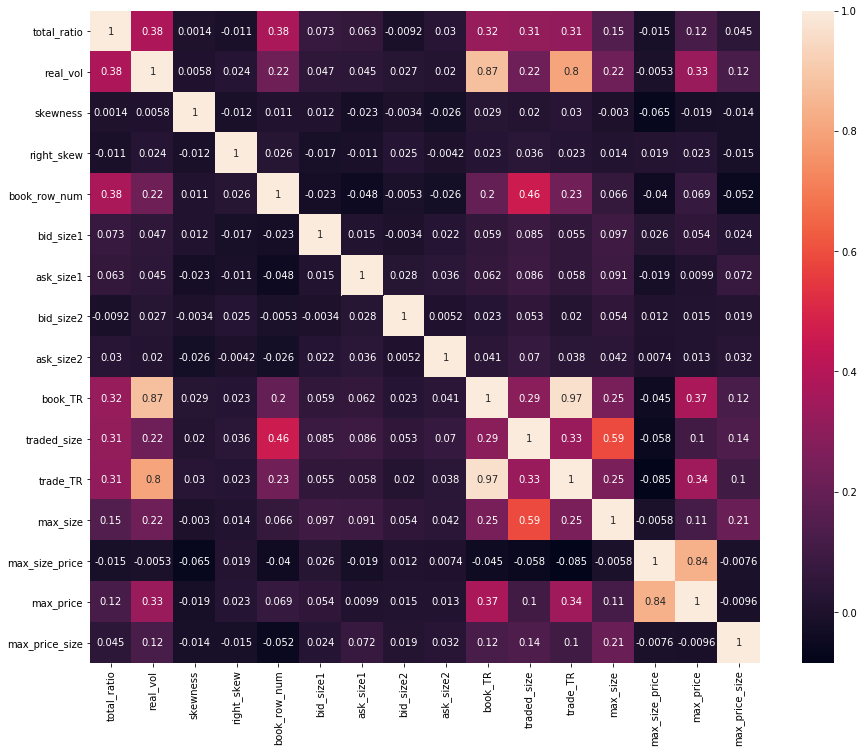

In [45]:
corr_mat = merged_df[merged_df['stock_id']==0].drop(['stock_id','time_id','target'], axis=1).corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr_mat, annot = True)

In [71]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_cols = list(merged_df.drop(['stock_id','time_id','target'], axis=1).columns)
features = '+'.join(df_cols)

y, X = dmatrices('target~'+features, data=merged_df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [72]:
vif.round(1)

,VIF_factor,features
0,93407.4,Intercept
1,1.8,total_ratio
2,4.2,real_vol
3,1.0,skewness
4,1.0,right_skew
5,1.8,book_row_num
6,2.8,bid_size1
7,3.3,ask_size1
8,3.3,bid_size2
9,3.5,ask_size2


## book_TR 제외하고 다시 VIF 계산

In [73]:
merged_df.drop('book_TR', axis=1, inplace=True)
df_cols = list(merged_df.drop(['stock_id','time_id','target'], axis=1).columns)
features = '+'.join(df_cols)

y, X = dmatrices('target~'+features, data=merged_df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [74]:
vif.round(1)

,VIF_factor,features
0,93376.4,Intercept
1,1.8,total_ratio
2,2.8,real_vol
3,1.0,skewness
4,1.0,right_skew
5,1.8,book_row_num
6,2.8,bid_size1
7,3.3,ask_size1
8,3.3,bid_size2
9,3.5,ask_size2


In [76]:
merged_df.to_csv('data/train_data2.csv', mode='w')

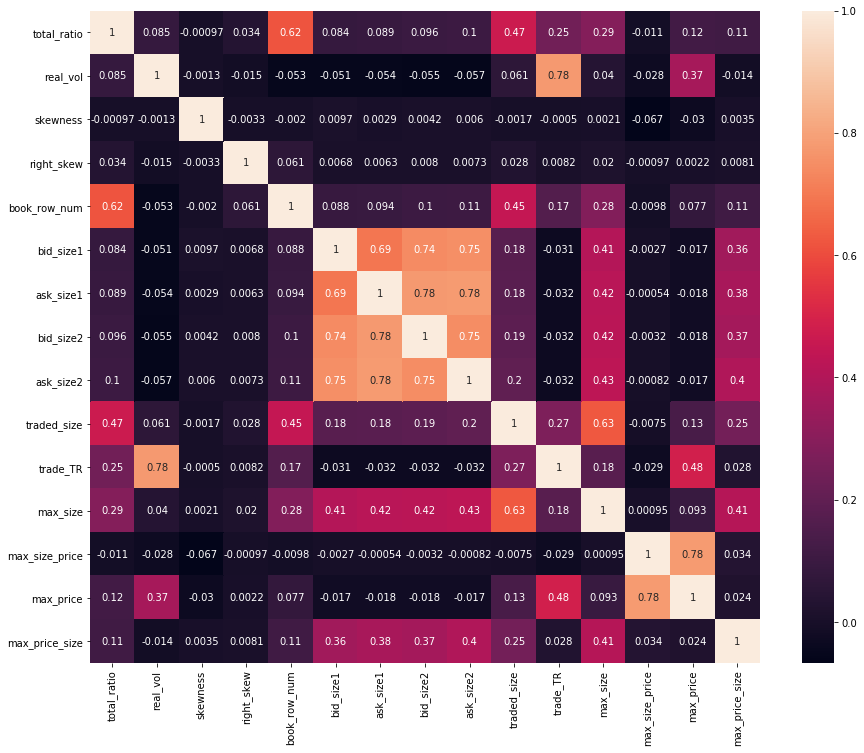

In [86]:
corr_mat = merged_df.drop(['stock_id','time_id','target'], axis=1).corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr_mat, annot=True)

## 모델 적합 - LinearRegression, RF, XGB, LGBM

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score

merged_df = pd.read_csv('data/train_data2.csv').drop('Unnamed: 0', axis=1)

X, y = merged_df.drop(['stock_id','time_id','target'], axis=1), merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
min_samples_split = [5, 10]
min_samples_leaf = [2, 4]
bootstrap = [True]

rf_param = {'n_estimators' : n_estimators,
            'max_features' : max_features,
            'max_depth' : max_depth,
            'min_samples_split' : min_samples_split,
            'min_samples_leaf' : min_samples_leaf,
            'bootstrap' : bootstrap}

random_rf = RandomizedSearchCV(rf, param_distributions = rf_param,n_iter = 100, verbose = 2, scoring = 'neg_mean_squared_error', cv = 4, n_jobs=-1)
random_rf.fit(X_train, y_train)

In [ ]:
print(grid_rf.best_params_)
print(np.round(grid_rf.best_score_, 4))
best_rf = grid_rf.best_estimator_